#  Sodium absorption ratio (SAR) prediction using Machine learning
## Nafyad Kawo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv('SAR_estimation.csv')


In [3]:
dataset.head

<bound method NDFrame.head of          x       y      Ca     Mg     Na        SAR
0   506734  941867    3.20   0.48  164.0  22.606942
1   508552  943199   12.16   2.74  164.0  11.059625
2   506187  943199   20.16   2.30  140.0   7.877987
3   503018  959480   60.80  22.34   60.0   1.672320
4   502454  962792   57.00  18.70   49.0   1.439913
5   505116  969081   55.48  16.87   70.0   2.112298
6   501572  968045   49.40  20.06   43.0   1.304000
7   506490  957774   64.00  24.48   52.0   1.401846
8   508185  965261   64.80  13.92  116.0   3.410324
9   506615  961264   53.60  24.96   56.0   1.584384
10  508991  969895   75.60  20.30   45.0   1.186656
11  505273  966105   42.56  20.06  130.0   4.116741
12  501572  968045   49.40  20.06   43.0   1.304000
13  491050  971817   32.76   6.55   40.0   1.669098
14  503717  971356   23.56   8.66   76.0   3.402633
15  497866  972874   23.20  11.56   97.0   4.109399
16  507157  977107  174.80   4.97  208.0   4.234480
17  506138  970846   23.56   7.75 

In [4]:
dataset.columns

Index(['x', 'y', 'Ca', 'Mg', 'Na', 'SAR'], dtype='object')

In [5]:
dataset.dtypes

x        int64
y        int64
Ca     float64
Mg     float64
Na     float64
SAR    float64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       21 non-null     int64  
 1   y       21 non-null     int64  
 2   Ca      21 non-null     float64
 3   Mg      21 non-null     float64
 4   Na      21 non-null     float64
 5   SAR     21 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.1 KB


In [7]:
# drop location and name
dataset= dataset.drop(['x', 'y'],axis=1 )

In [8]:
X1 = dataset.iloc[:, :-1]


Text(0.5, 1.0, 'Correlation Matrix of Water quality')

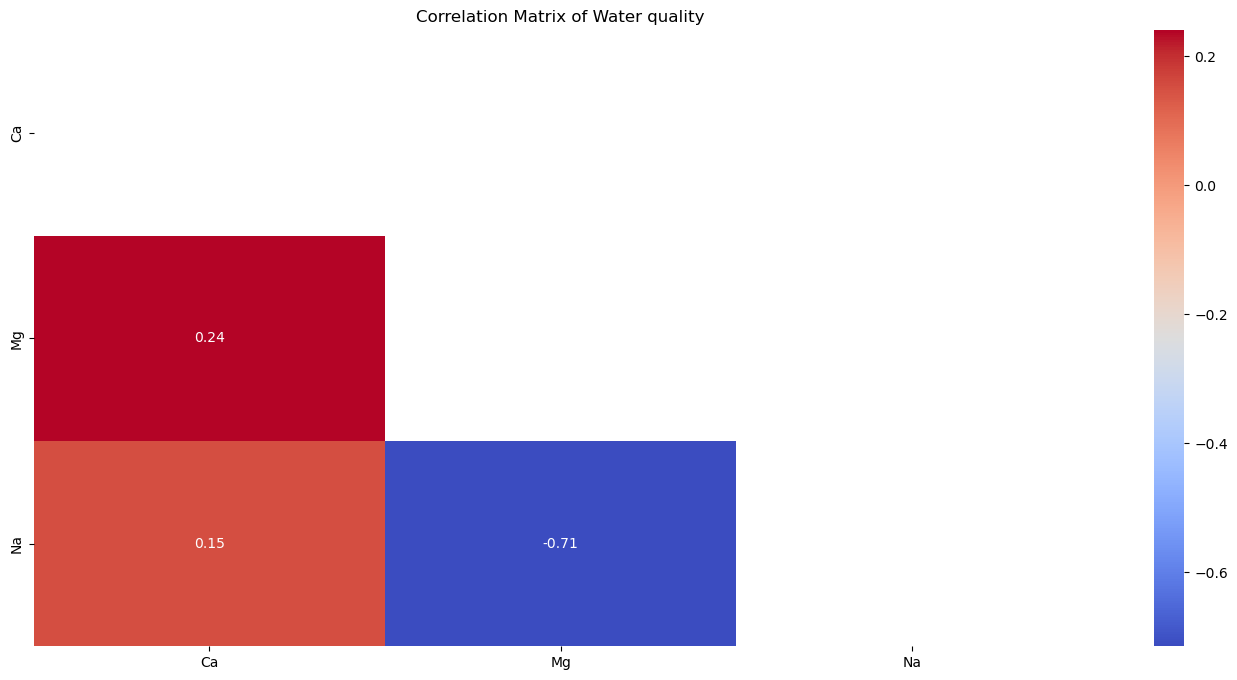

In [9]:
#plot half corr () matrix
plt.subplots(figsize=(17,8))
matrix = np.triu(X1.corr())
ax = sns.heatmap(X1.corr(), mask = matrix, cmap = 'coolwarm',annot=True)
plt.title('Correlation Matrix of Water quality', fontsize = 12)


In [10]:
# define features and target 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
##Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [12]:
X_train.shape,y_train.shape, y_test.shape, X_test.shape

((12, 3), (12,), (9,), (9, 3))

In [13]:
#Data Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
##Import Models 
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor


In [15]:
SVCl = SVR(kernel = 'linear')
DTC= DecisionTreeRegressor()
RFC= RandomForestRegressor()
CatBoostC= CatBoostRegressor(iterations= 10000)


In [16]:
## SV fit and predict
SVCl.fit(X_train, y_train)
YpredSVC =SVCl.predict(X_test)
#DTCfit and predict
DTC.fit(X_train, y_train)
YpredDTC =DTC.predict(X_test)
YtrainDTC=DTC.predict(X_train)


In [17]:
# RandomForestClassifier fit and predict
RFC.fit(X_train, y_train)
YpredRFC =RFC.predict(X_test)


In [18]:
#CatBoostClassifier fit and predict
CatBoostC.fit(X_train, y_train)
Ypredcatb =CatBoostC.predict(X_test)


Learning rate set to 0.003131
0:	learn: 5.7757510	total: 133ms	remaining: 22m 5s
1:	learn: 5.7702616	total: 133ms	remaining: 11m 5s
2:	learn: 5.7648659	total: 134ms	remaining: 7m 25s
3:	learn: 5.7592655	total: 134ms	remaining: 5m 35s
4:	learn: 5.7543303	total: 135ms	remaining: 4m 29s
5:	learn: 5.7494905	total: 136ms	remaining: 3m 46s
6:	learn: 5.7444402	total: 137ms	remaining: 3m 15s
7:	learn: 5.7391970	total: 137ms	remaining: 2m 51s
8:	learn: 5.7344944	total: 138ms	remaining: 2m 32s
9:	learn: 5.7297159	total: 138ms	remaining: 2m 18s
10:	learn: 5.7244375	total: 139ms	remaining: 2m 6s
11:	learn: 5.7192771	total: 139ms	remaining: 1m 55s
12:	learn: 5.7145468	total: 140ms	remaining: 1m 47s
13:	learn: 5.7099981	total: 141ms	remaining: 1m 40s
14:	learn: 5.7053263	total: 141ms	remaining: 1m 33s
15:	learn: 5.6999664	total: 142ms	remaining: 1m 28s
16:	learn: 5.6954602	total: 142ms	remaining: 1m 23s
17:	learn: 5.6901125	total: 143ms	remaining: 1m 19s
18:	learn: 5.6851379	total: 143ms	remaining: 

278:	learn: 4.5329243	total: 192ms	remaining: 6.68s
279:	learn: 4.5291572	total: 192ms	remaining: 6.67s
280:	learn: 4.5256074	total: 192ms	remaining: 6.65s
281:	learn: 4.5218615	total: 193ms	remaining: 6.64s
282:	learn: 4.5180917	total: 193ms	remaining: 6.62s
283:	learn: 4.5144368	total: 193ms	remaining: 6.6s
284:	learn: 4.5105020	total: 193ms	remaining: 6.58s
285:	learn: 4.5067990	total: 193ms	remaining: 6.56s
286:	learn: 4.5031147	total: 193ms	remaining: 6.55s
287:	learn: 4.4988780	total: 194ms	remaining: 6.53s
288:	learn: 4.4946253	total: 194ms	remaining: 6.53s
289:	learn: 4.4908525	total: 194ms	remaining: 6.51s
290:	learn: 4.4870407	total: 195ms	remaining: 6.49s
291:	learn: 4.4834303	total: 195ms	remaining: 6.48s
292:	learn: 4.4798678	total: 195ms	remaining: 6.46s
293:	learn: 4.4758609	total: 195ms	remaining: 6.44s
294:	learn: 4.4719351	total: 195ms	remaining: 6.43s
295:	learn: 4.4678117	total: 196ms	remaining: 6.41s
296:	learn: 4.4640133	total: 196ms	remaining: 6.4s
297:	learn: 4.

1110:	learn: 2.2930846	total: 352ms	remaining: 2.81s
1111:	learn: 2.2912567	total: 352ms	remaining: 2.81s
1112:	learn: 2.2894653	total: 352ms	remaining: 2.81s
1113:	learn: 2.2875521	total: 353ms	remaining: 2.81s
1114:	learn: 2.2857754	total: 353ms	remaining: 2.81s
1115:	learn: 2.2840481	total: 353ms	remaining: 2.81s
1116:	learn: 2.2822330	total: 353ms	remaining: 2.81s
1117:	learn: 2.2803962	total: 353ms	remaining: 2.81s
1118:	learn: 2.2785755	total: 354ms	remaining: 2.81s
1119:	learn: 2.2767780	total: 354ms	remaining: 2.8s
1120:	learn: 2.2749800	total: 354ms	remaining: 2.8s
1121:	learn: 2.2731762	total: 354ms	remaining: 2.8s
1122:	learn: 2.2713966	total: 354ms	remaining: 2.8s
1123:	learn: 2.2696656	total: 354ms	remaining: 2.8s
1124:	learn: 2.2678811	total: 355ms	remaining: 2.8s
1125:	learn: 2.2660336	total: 355ms	remaining: 2.8s
1126:	learn: 2.2642091	total: 355ms	remaining: 2.79s
1127:	learn: 2.2624212	total: 355ms	remaining: 2.79s
1128:	learn: 2.2605854	total: 355ms	remaining: 2.79s


1875:	learn: 1.2560113	total: 508ms	remaining: 2.2s
1876:	learn: 1.2550171	total: 509ms	remaining: 2.2s
1877:	learn: 1.2540344	total: 509ms	remaining: 2.2s
1878:	learn: 1.2531021	total: 509ms	remaining: 2.2s
1879:	learn: 1.2521243	total: 509ms	remaining: 2.2s
1880:	learn: 1.2511859	total: 510ms	remaining: 2.2s
1881:	learn: 1.2502080	total: 510ms	remaining: 2.2s
1882:	learn: 1.2492255	total: 510ms	remaining: 2.2s
1883:	learn: 1.2482970	total: 510ms	remaining: 2.2s
1884:	learn: 1.2473617	total: 510ms	remaining: 2.2s
1885:	learn: 1.2463690	total: 511ms	remaining: 2.2s
1886:	learn: 1.2453806	total: 511ms	remaining: 2.2s
1887:	learn: 1.2444054	total: 511ms	remaining: 2.19s
1888:	learn: 1.2434355	total: 511ms	remaining: 2.19s
1889:	learn: 1.2424644	total: 512ms	remaining: 2.19s
1890:	learn: 1.2414810	total: 512ms	remaining: 2.19s
1891:	learn: 1.2404962	total: 512ms	remaining: 2.19s
1892:	learn: 1.2395255	total: 512ms	remaining: 2.19s
1893:	learn: 1.2385449	total: 512ms	remaining: 2.19s
1894:

2649:	learn: 0.6850082	total: 672ms	remaining: 1.86s
2650:	learn: 0.6844741	total: 672ms	remaining: 1.86s
2651:	learn: 0.6839373	total: 672ms	remaining: 1.86s
2652:	learn: 0.6833993	total: 673ms	remaining: 1.86s
2653:	learn: 0.6828590	total: 673ms	remaining: 1.86s
2654:	learn: 0.6823217	total: 673ms	remaining: 1.86s
2655:	learn: 0.6817871	total: 673ms	remaining: 1.86s
2656:	learn: 0.6812549	total: 674ms	remaining: 1.86s
2657:	learn: 0.6807231	total: 674ms	remaining: 1.86s
2658:	learn: 0.6801902	total: 674ms	remaining: 1.86s
2659:	learn: 0.6796592	total: 674ms	remaining: 1.86s
2660:	learn: 0.6791233	total: 674ms	remaining: 1.86s
2661:	learn: 0.6785932	total: 675ms	remaining: 1.86s
2662:	learn: 0.6780601	total: 675ms	remaining: 1.86s
2663:	learn: 0.6775283	total: 675ms	remaining: 1.86s
2664:	learn: 0.6769954	total: 675ms	remaining: 1.86s
2665:	learn: 0.6764670	total: 676ms	remaining: 1.86s
2666:	learn: 0.6759396	total: 676ms	remaining: 1.86s
2667:	learn: 0.6754120	total: 676ms	remaining:

3365:	learn: 0.3912962	total: 837ms	remaining: 1.65s
3366:	learn: 0.3909892	total: 837ms	remaining: 1.65s
3367:	learn: 0.3906825	total: 837ms	remaining: 1.65s
3368:	learn: 0.3903788	total: 838ms	remaining: 1.65s
3369:	learn: 0.3900726	total: 838ms	remaining: 1.65s
3370:	learn: 0.3897666	total: 838ms	remaining: 1.65s
3371:	learn: 0.3894609	total: 838ms	remaining: 1.65s
3372:	learn: 0.3891554	total: 838ms	remaining: 1.65s
3373:	learn: 0.3888501	total: 839ms	remaining: 1.65s
3374:	learn: 0.3885451	total: 839ms	remaining: 1.65s
3375:	learn: 0.3882404	total: 839ms	remaining: 1.65s
3376:	learn: 0.3879358	total: 840ms	remaining: 1.65s
3377:	learn: 0.3876316	total: 840ms	remaining: 1.65s
3378:	learn: 0.3873275	total: 840ms	remaining: 1.65s
3379:	learn: 0.3870237	total: 840ms	remaining: 1.65s
3380:	learn: 0.3867202	total: 841ms	remaining: 1.65s
3381:	learn: 0.3864169	total: 841ms	remaining: 1.65s
3382:	learn: 0.3861138	total: 841ms	remaining: 1.65s
3383:	learn: 0.3858110	total: 841ms	remaining:

4047:	learn: 0.2301132	total: 1s	remaining: 1.47s
4048:	learn: 0.2299368	total: 1s	remaining: 1.47s
4049:	learn: 0.2297606	total: 1s	remaining: 1.47s
4050:	learn: 0.2295845	total: 1s	remaining: 1.47s
4051:	learn: 0.2294086	total: 1s	remaining: 1.47s
4052:	learn: 0.2292327	total: 1s	remaining: 1.47s
4053:	learn: 0.2290571	total: 1s	remaining: 1.47s
4054:	learn: 0.2288815	total: 1s	remaining: 1.47s
4055:	learn: 0.2287062	total: 1s	remaining: 1.47s
4056:	learn: 0.2285309	total: 1s	remaining: 1.47s
4057:	learn: 0.2283558	total: 1s	remaining: 1.47s
4058:	learn: 0.2281808	total: 1s	remaining: 1.47s
4059:	learn: 0.2280060	total: 1s	remaining: 1.47s
4060:	learn: 0.2278313	total: 1s	remaining: 1.47s
4061:	learn: 0.2276567	total: 1s	remaining: 1.47s
4062:	learn: 0.2274816	total: 1s	remaining: 1.47s
4063:	learn: 0.2273073	total: 1s	remaining: 1.47s
4064:	learn: 0.2271331	total: 1s	remaining: 1.47s
4065:	learn: 0.2269584	total: 1s	remaining: 1.47s
4066:	learn: 0.2267837	total: 1s	remaining: 1.47s


4798:	learn: 0.1288326	total: 1.17s	remaining: 1.26s
4799:	learn: 0.1287331	total: 1.17s	remaining: 1.26s
4800:	learn: 0.1286321	total: 1.17s	remaining: 1.26s
4801:	learn: 0.1285327	total: 1.17s	remaining: 1.26s
4802:	learn: 0.1284318	total: 1.17s	remaining: 1.26s
4803:	learn: 0.1283327	total: 1.17s	remaining: 1.26s
4804:	learn: 0.1282319	total: 1.17s	remaining: 1.26s
4805:	learn: 0.1281329	total: 1.17s	remaining: 1.26s
4806:	learn: 0.1280340	total: 1.17s	remaining: 1.26s
4807:	learn: 0.1279335	total: 1.17s	remaining: 1.26s
4808:	learn: 0.1278331	total: 1.17s	remaining: 1.26s
4809:	learn: 0.1277344	total: 1.17s	remaining: 1.26s
4810:	learn: 0.1276341	total: 1.17s	remaining: 1.26s
4811:	learn: 0.1275339	total: 1.17s	remaining: 1.26s
4812:	learn: 0.1274354	total: 1.17s	remaining: 1.26s
4813:	learn: 0.1273371	total: 1.17s	remaining: 1.26s
4814:	learn: 0.1272371	total: 1.17s	remaining: 1.26s
4815:	learn: 0.1271372	total: 1.17s	remaining: 1.26s
4816:	learn: 0.1270391	total: 1.17s	remaining:

5580:	learn: 0.0699979	total: 1.33s	remaining: 1.05s
5581:	learn: 0.0699438	total: 1.33s	remaining: 1.05s
5582:	learn: 0.0698890	total: 1.33s	remaining: 1.05s
5583:	learn: 0.0698350	total: 1.33s	remaining: 1.05s
5584:	learn: 0.0697803	total: 1.33s	remaining: 1.05s
5585:	learn: 0.0697264	total: 1.33s	remaining: 1.05s
5586:	learn: 0.0696717	total: 1.33s	remaining: 1.05s
5587:	learn: 0.0696179	total: 1.33s	remaining: 1.05s
5588:	learn: 0.0695633	total: 1.33s	remaining: 1.05s
5589:	learn: 0.0695096	total: 1.33s	remaining: 1.05s
5590:	learn: 0.0694551	total: 1.33s	remaining: 1.05s
5591:	learn: 0.0694014	total: 1.33s	remaining: 1.05s
5592:	learn: 0.0693470	total: 1.33s	remaining: 1.05s
5593:	learn: 0.0692935	total: 1.33s	remaining: 1.05s
5594:	learn: 0.0692391	total: 1.33s	remaining: 1.05s
5595:	learn: 0.0691857	total: 1.33s	remaining: 1.05s
5596:	learn: 0.0691322	total: 1.33s	remaining: 1.05s
5597:	learn: 0.0690780	total: 1.33s	remaining: 1.05s
5598:	learn: 0.0690247	total: 1.33s	remaining:

6319:	learn: 0.0395130	total: 1.5s	remaining: 871ms
6320:	learn: 0.0394823	total: 1.5s	remaining: 871ms
6321:	learn: 0.0394523	total: 1.5s	remaining: 871ms
6322:	learn: 0.0394221	total: 1.5s	remaining: 871ms
6323:	learn: 0.0393915	total: 1.5s	remaining: 870ms
6324:	learn: 0.0393615	total: 1.5s	remaining: 870ms
6325:	learn: 0.0393314	total: 1.5s	remaining: 870ms
6326:	learn: 0.0393015	total: 1.5s	remaining: 870ms
6327:	learn: 0.0392710	total: 1.5s	remaining: 869ms
6328:	learn: 0.0392409	total: 1.5s	remaining: 869ms
6329:	learn: 0.0392110	total: 1.5s	remaining: 869ms
6330:	learn: 0.0391812	total: 1.5s	remaining: 869ms
6331:	learn: 0.0391508	total: 1.5s	remaining: 868ms
6332:	learn: 0.0391208	total: 1.5s	remaining: 868ms
6333:	learn: 0.0390911	total: 1.5s	remaining: 868ms
6334:	learn: 0.0390614	total: 1.5s	remaining: 868ms
6335:	learn: 0.0390311	total: 1.5s	remaining: 867ms
6336:	learn: 0.0390012	total: 1.5s	remaining: 867ms
6337:	learn: 0.0389715	total: 1.5s	remaining: 867ms
6338:	learn:

7035:	learn: 0.0228089	total: 1.66s	remaining: 699ms
7036:	learn: 0.0227914	total: 1.66s	remaining: 699ms
7037:	learn: 0.0227740	total: 1.66s	remaining: 699ms
7038:	learn: 0.0227566	total: 1.66s	remaining: 698ms
7039:	learn: 0.0227392	total: 1.66s	remaining: 698ms
7040:	learn: 0.0227218	total: 1.66s	remaining: 698ms
7041:	learn: 0.0227044	total: 1.66s	remaining: 698ms
7042:	learn: 0.0226871	total: 1.66s	remaining: 697ms
7043:	learn: 0.0226697	total: 1.66s	remaining: 697ms
7044:	learn: 0.0226524	total: 1.66s	remaining: 697ms
7045:	learn: 0.0226350	total: 1.66s	remaining: 697ms
7046:	learn: 0.0226175	total: 1.66s	remaining: 697ms
7047:	learn: 0.0226000	total: 1.66s	remaining: 697ms
7048:	learn: 0.0225825	total: 1.66s	remaining: 696ms
7049:	learn: 0.0225651	total: 1.66s	remaining: 696ms
7050:	learn: 0.0225477	total: 1.66s	remaining: 696ms
7051:	learn: 0.0225302	total: 1.66s	remaining: 696ms
7052:	learn: 0.0225127	total: 1.66s	remaining: 695ms
7053:	learn: 0.0224953	total: 1.66s	remaining:

7728:	learn: 0.0134226	total: 1.82s	remaining: 534ms
7729:	learn: 0.0134127	total: 1.82s	remaining: 534ms
7730:	learn: 0.0134028	total: 1.82s	remaining: 534ms
7731:	learn: 0.0133930	total: 1.82s	remaining: 533ms
7732:	learn: 0.0133831	total: 1.82s	remaining: 533ms
7733:	learn: 0.0133733	total: 1.82s	remaining: 533ms
7734:	learn: 0.0133634	total: 1.82s	remaining: 533ms
7735:	learn: 0.0133536	total: 1.82s	remaining: 532ms
7736:	learn: 0.0133438	total: 1.82s	remaining: 532ms
7737:	learn: 0.0133339	total: 1.82s	remaining: 532ms
7738:	learn: 0.0133241	total: 1.82s	remaining: 532ms
7739:	learn: 0.0133143	total: 1.82s	remaining: 531ms
7740:	learn: 0.0133045	total: 1.82s	remaining: 531ms
7741:	learn: 0.0132948	total: 1.82s	remaining: 531ms
7742:	learn: 0.0132850	total: 1.82s	remaining: 531ms
7743:	learn: 0.0132752	total: 1.82s	remaining: 530ms
7744:	learn: 0.0132655	total: 1.82s	remaining: 530ms
7745:	learn: 0.0132552	total: 1.82s	remaining: 530ms
7746:	learn: 0.0132451	total: 1.82s	remaining:

8470:	learn: 0.0076901	total: 1.98s	remaining: 358ms
8471:	learn: 0.0076837	total: 1.98s	remaining: 358ms
8472:	learn: 0.0076773	total: 1.98s	remaining: 357ms
8473:	learn: 0.0076710	total: 1.98s	remaining: 357ms
8474:	learn: 0.0076646	total: 1.98s	remaining: 357ms
8475:	learn: 0.0076582	total: 1.98s	remaining: 357ms
8476:	learn: 0.0076518	total: 1.98s	remaining: 356ms
8477:	learn: 0.0076455	total: 1.98s	remaining: 356ms
8478:	learn: 0.0076391	total: 1.98s	remaining: 356ms
8479:	learn: 0.0076328	total: 1.98s	remaining: 356ms
8480:	learn: 0.0076264	total: 1.98s	remaining: 355ms
8481:	learn: 0.0076201	total: 1.99s	remaining: 355ms
8482:	learn: 0.0076137	total: 1.99s	remaining: 355ms
8483:	learn: 0.0076074	total: 1.99s	remaining: 355ms
8484:	learn: 0.0076011	total: 1.99s	remaining: 355ms
8485:	learn: 0.0075948	total: 1.99s	remaining: 354ms
8486:	learn: 0.0075885	total: 1.99s	remaining: 354ms
8487:	learn: 0.0075822	total: 1.99s	remaining: 354ms
8488:	learn: 0.0075759	total: 1.99s	remaining:

9171:	learn: 0.0043651	total: 2.14s	remaining: 194ms
9172:	learn: 0.0043616	total: 2.15s	remaining: 193ms
9173:	learn: 0.0043581	total: 2.15s	remaining: 193ms
9174:	learn: 0.0043547	total: 2.15s	remaining: 193ms
9175:	learn: 0.0043512	total: 2.15s	remaining: 193ms
9176:	learn: 0.0043478	total: 2.15s	remaining: 192ms
9177:	learn: 0.0043444	total: 2.15s	remaining: 192ms
9178:	learn: 0.0043409	total: 2.15s	remaining: 192ms
9179:	learn: 0.0043375	total: 2.15s	remaining: 192ms
9180:	learn: 0.0043340	total: 2.15s	remaining: 192ms
9181:	learn: 0.0043306	total: 2.15s	remaining: 191ms
9182:	learn: 0.0043272	total: 2.15s	remaining: 191ms
9183:	learn: 0.0043238	total: 2.15s	remaining: 191ms
9184:	learn: 0.0043203	total: 2.15s	remaining: 191ms
9185:	learn: 0.0043169	total: 2.15s	remaining: 190ms
9186:	learn: 0.0043135	total: 2.15s	remaining: 190ms
9187:	learn: 0.0043101	total: 2.15s	remaining: 190ms
9188:	learn: 0.0043067	total: 2.15s	remaining: 190ms
9189:	learn: 0.0043033	total: 2.15s	remaining:

9905:	learn: 0.0024535	total: 2.31s	remaining: 21.9ms
9906:	learn: 0.0024516	total: 2.31s	remaining: 21.7ms
9907:	learn: 0.0024497	total: 2.31s	remaining: 21.4ms
9908:	learn: 0.0024478	total: 2.31s	remaining: 21.2ms
9909:	learn: 0.0024458	total: 2.31s	remaining: 21ms
9910:	learn: 0.0024440	total: 2.31s	remaining: 20.8ms
9911:	learn: 0.0024420	total: 2.31s	remaining: 20.5ms
9912:	learn: 0.0024401	total: 2.31s	remaining: 20.3ms
9913:	learn: 0.0024382	total: 2.31s	remaining: 20.1ms
9914:	learn: 0.0024363	total: 2.31s	remaining: 19.8ms
9915:	learn: 0.0024344	total: 2.31s	remaining: 19.6ms
9916:	learn: 0.0024324	total: 2.31s	remaining: 19.4ms
9917:	learn: 0.0024305	total: 2.31s	remaining: 19.1ms
9918:	learn: 0.0024286	total: 2.31s	remaining: 18.9ms
9919:	learn: 0.0024267	total: 2.31s	remaining: 18.7ms
9920:	learn: 0.0024248	total: 2.31s	remaining: 18.4ms
9921:	learn: 0.0024229	total: 2.31s	remaining: 18.2ms
9922:	learn: 0.0024210	total: 2.31s	remaining: 18ms
9923:	learn: 0.0024191	total: 2.

In [19]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score

In [20]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
# DT Model performnce for Training data set 
mae = mean_absolute_error(y_train, DTC.predict(X_train))
mse = mean_squared_error(y_train, DTC.predict(X_train))
r2 = r2_score(y_train, DTC.predict(X_train))
print("The DT model performance for training set")
print('MAE:{}'.format(mae))
print('MSE : {}'.format(mse))
print('r2 :  {}'.format(r2))
# DT model evaluation for testing set
mae = mean_absolute_error(y_test, YpredDTC)
mse = mean_squared_error(y_test, YpredDTC)
r2 =  r2_score(y_test, YpredDTC)
print("The DT model performance for testing set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2 : {}'.format(r2))
print("--------------------------------------")
#SVR Model performnce for Training data set 
mae = mean_absolute_error(y_train, SVCl.predict(X_train))
mse = mean_squared_error(y_train, SVCl.predict(X_train))
r2 = r2_score(y_train, SVCl.predict(X_train))
print("The SVC model performance for training set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2 : {}'.format(r2))
# SVR  model evaluation for testing set
mae = mean_absolute_error(y_test, YpredSVC)
mse = mean_squared_error(y_test, YpredSVC)
r2 = r2_score(y_test, YpredSVC)
print("The SVR model performance for testing set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2: {}'.format(r2))
print("--------------------------------------")
# RF Model performnce for Training data set 
mae = mean_absolute_error(y_train, RFC.predict(X_train))
mse = mean_squared_error(y_train, RFC.predict(X_train))
r2 = r2_score(y_train, RFC.predict(X_train))
print("The RF model performance for training set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2: {}'.format(r2))
# RF model evaluation for testing set
mae = mean_absolute_error(y_test, YpredRFC)
mse = mean_squared_error(y_test, YpredRFC)
r2 =  r2_score(y_test, YpredRFC)
print("The RF performance for testing set")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("--------------------------------------")
# CatBoost Model performnce for Training data set
mae = mean_absolute_error(y_train, CatBoostC.predict(X_train))
mse = mean_squared_error(y_train, CatBoostC.predict(X_train))
r2 = r2_score(y_train, CatBoostC.predict(X_train)) 
print("The CatBoost model performance for training set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2 : {}'.format(r2))
# CatBoost  model evaluation for testing set
mae = mean_absolute_error(y_test, Ypredcatb)
mse = mean_squared_error(y_test, Ypredcatb)
r2 =  r2_score(y_test, Ypredcatb)
print("The catBoost performance for testing set")
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('r2 : {}'.format(r2))
print("--------------------------------------")


The DT model performance for training set
MAE:0.0
MSE : 0.0
r2 :  1.0
The DT model performance for testing set
MAE: 1.3603216666666667
MSE: 3.1108388367661117
r2 : 0.6289560514408691
--------------------------------------
The SVC model performance for training set
MAE: 1.476287120125426
MSE: 18.437112085554816
r2 : 0.44829914815597227
The SVR model performance for testing set
MAE: 0.7599820507345171
MSE: 1.6195935752067974
r2: 0.8068236810909688
--------------------------------------
The RF model performance for training set
MAE: 0.8367021341666682
MSE: 2.8425451440153733
r2: 0.9149414197797782
The RF performance for testing set
MAE is 0.48639210444444697
MSE is 0.5668574107202695
R2 score is 0.9323883290070075
--------------------------------------
The CatBoost model performance for training set
MAE: 0.0013026761525409085
MSE: 5.195114845994486e-06
r2 : 0.9999998445445647
The catBoost performance for testing set
MAE: 0.5190023504147692
MSE: 0.5571557604787096
r2 : 0.9335454891178508
-

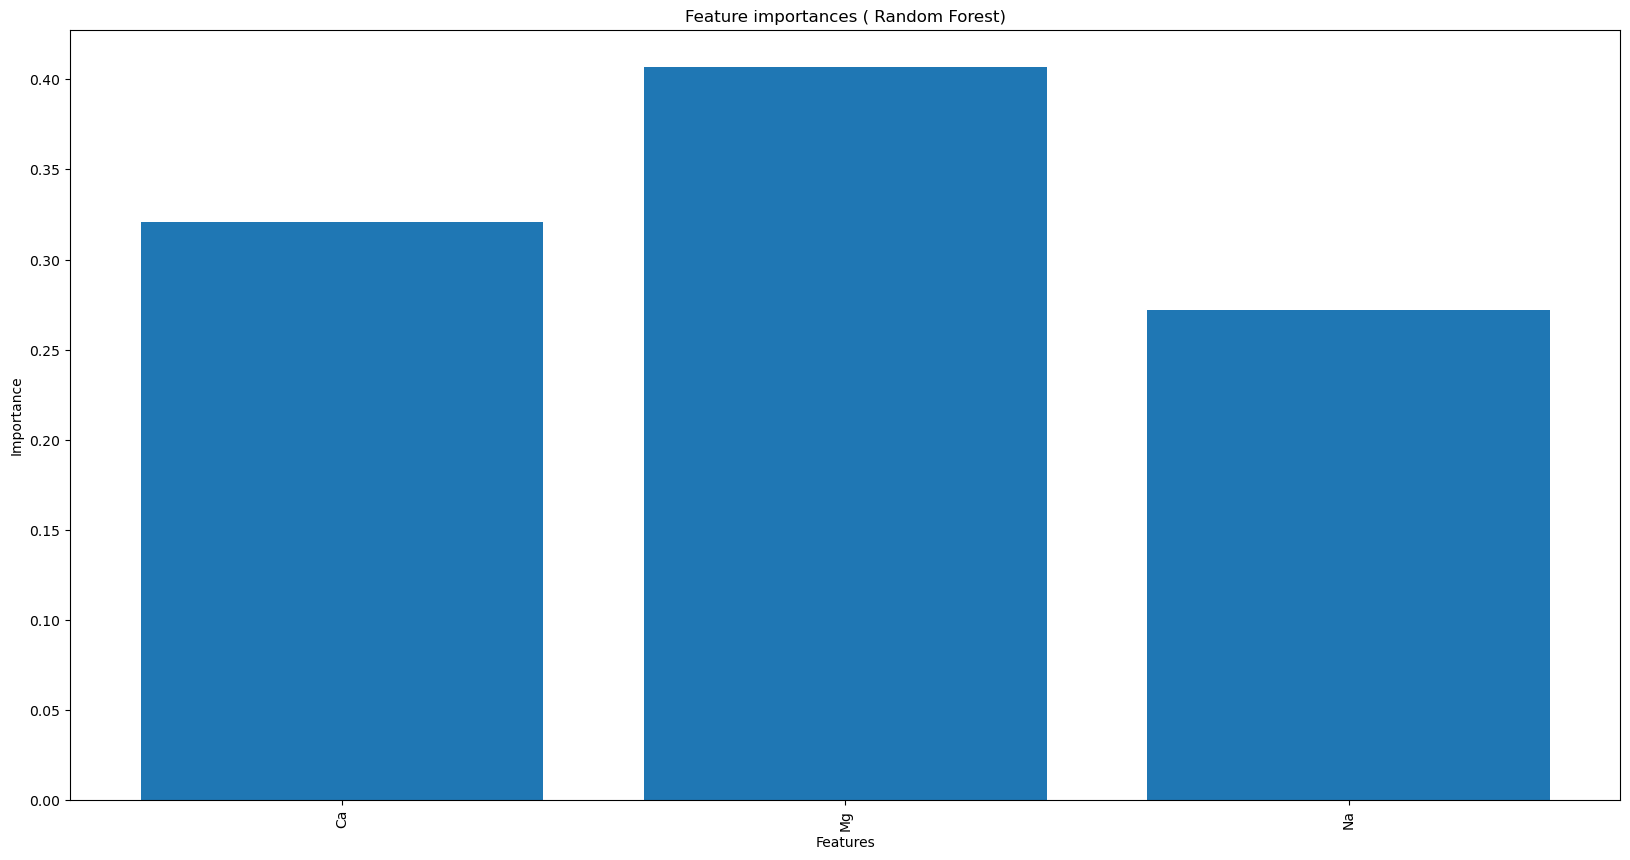

In [21]:
# features importances
plt.figure(figsize = (20,10))
plt.bar(X1.columns, RFC.feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importances ( Random Forest)")
plt.show()

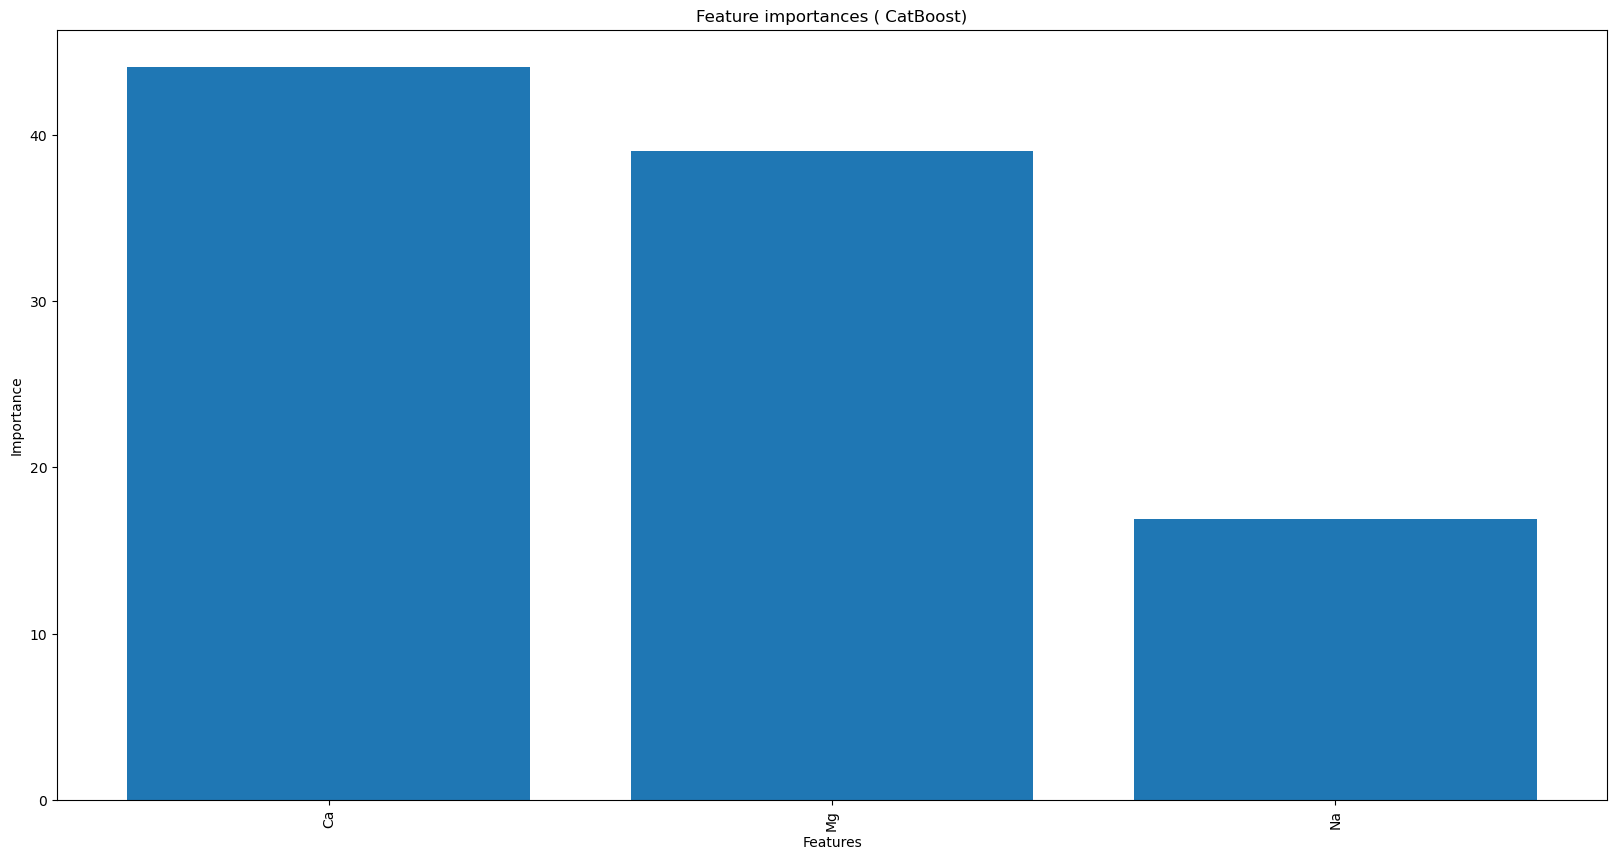

In [22]:
# features importances
plt.figure(figsize = (20,10))
plt.bar(X1.columns, CatBoostC.feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importances ( CatBoost)")
plt.show()

In [23]:
# SHap importance is checked
import shap
X_importance = X_test
explainer = shap.TreeExplainer(CatBoostC)
shap_values = explainer.shap_values(X_importance)

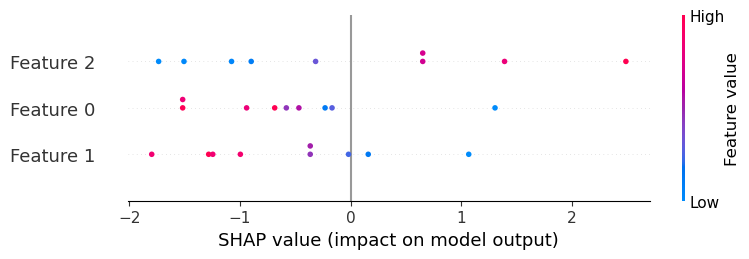

In [24]:
shap.summary_plot(shap_values, X_importance)

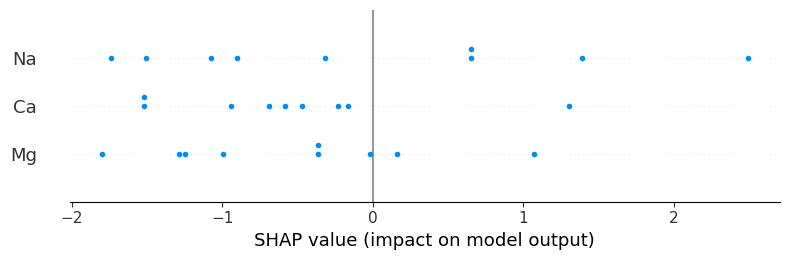

In [25]:
shap.summary_plot(shap_values, X1.columns)

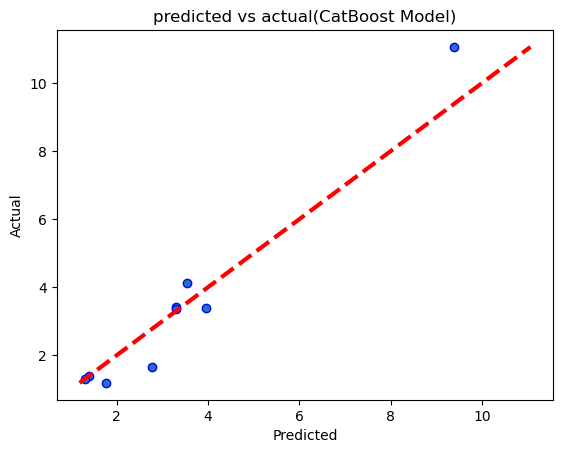

In [26]:
fig, ax = plt.subplots()
ax.scatter(Ypredcatb, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('predicted vs actual(CatBoost Model)')
plt.show()